In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import requests
from csv import writer
import time
from bs4 import BeautifulSoup

In [2]:
# Importing the input data

df_input = pd.read_excel('20211030 Test Assignment/Input.xlsx')
df_input

,URL_ID,URL
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...
3,bctech2014,https://insights.blackcoffer.com/effective-man...
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...
...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...


In [3]:
# Importing the output data

df_output = pd.read_excel('20211030 Test Assignment/Output Data Structure.xlsx')
df_output

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bctech2014,https://insights.blackcoffer.com/effective-man...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the required columns names given in the output file

df_output.columns.tolist()

['URL_ID',
 'URL',
 'POSITIVE SCORE',
 'NEGATIVE SCORE',
 'POLARITY SCORE',
 'SUBJECTIVITY SCORE',
 'AVG SENTENCE LENGTH',
 'PERCENTAGE OF COMPLEX WORDS',
 'FOG INDEX',
 'AVG NUMBER OF WORDS PER SENTENCE',
 'COMPLEX WORD COUNT',
 'WORD COUNT',
 'SYLLABLE PER WORD',
 'PERSONAL PRONOUNS',
 'AVG WORD LENGTH']

### Extracting data from First Website

- We will create code for Data Extraction from first URL of the list.
- This will help us create a program structure for all other url's data extraction

In [5]:
# Referencing the url

requests.get('https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/')

# Since we are not getting any error, we can extract the data from website url

<Response [200]>

'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>ML and AI-based insurance premium model to predict premium to be charged by the insurance company - Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v23.4 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<link rel="canonical" href="https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/" />\n\t<meta property="og:locale" content="en_US" />
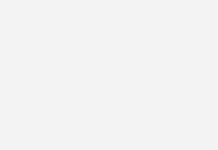
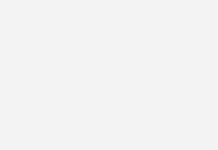
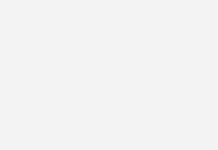
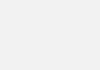
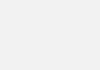
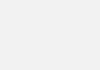
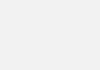
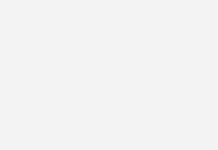
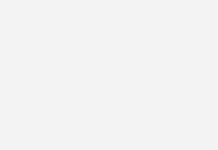
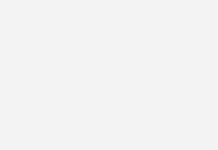
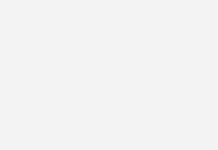

In [6]:
# Accessing the Web Page from URL

page = requests.get('https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/')

page_content = page.text
page_content

In [7]:
# Using BeautifulSoup for data extraction from web page in html form

soup = BeautifulSoup(page_content,'html.parser')
soup

<!DOCTYPE html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
<title>ML and AI-based insurance premium model to predict premium to be charged by the insurance company - Blackcoffer Insights</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<!-- This site is optimized with the Yoast SEO plugin v23.4 - https://yoast.com/wordpress/plugins/seo/ -->
<link href="https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/" rel="canonical"/>
<meta content="en_US" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="ML and

In [8]:
#creating list for storing the title of the web page

new_list = []
for link in soup.find_all(class_="td-post-title"):
    article_title = link.find('h1', class_="entry-title").get_text()
    new_list.append([article_title])
    
new_list

[['ML and AI-based insurance premium model to predict premium to be charged by the insurance company']]

In [9]:
soup.find_all('div', class_="td-post-content tagdiv-type")

[<div class="td-post-content tagdiv-type">
 <h1 class="wp-block-heading"><strong>Client Background</strong></h1>
 <p><strong>Client:</strong> A leading insurance firm worldwide</p>
 <p><strong>Industry Type: </strong>BFSI</p>
 <p><strong>Products &amp; Services: </strong>Insurance</p>
 <p><strong>Organization Size:</strong> 10000+<br/></p>
 <h1 class="wp-block-heading"><strong>The Problem</strong></h1>
 <p>The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolvin

In [10]:
#creating list for storing the content of the web page

new_list2 = []
link = soup.find_all('div', class_="td-post-content tagdiv-type")

for article in link:
    for paragraph in article.find_all('p'):
        article_content = paragraph.get_text()
        new_list2.append([article_content])

new_list2

[['Client:\xa0A leading insurance firm worldwide'],
 ['Industry Type:\xa0BFSI'],
 ['Products & Services:\xa0Insurance'],
 ['Organization Size:\xa010000+'],
 ['The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolving risk factors.'],
 ['The problem at hand involves developing robust AI and ML models that can effectively analyze a multitude of dynamic variables influencing the risk profile of Public Company Directors. These variables include market conditions, re

In [11]:
# Adding all the paragraphs extracted as one using arrays in a list

arr_list = [np.array(new_list2)]
arr_list

[array([['Client:\xa0A leading insurance firm worldwide'],
        ['Industry Type:\xa0BFSI'],
        ['Products & Services:\xa0Insurance'],
        ['Organization Size:\xa010000+'],
        ['The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolving risk factors.'],
        ['The problem at hand involves developing robust AI and ML models that can effectively analyze a multitude of dynamic variables influencing the risk profile of Public Company Directors. The

In [12]:
# Concatenate arrays into a single array with line separator

sep = '\n'
concatenated_arr = np.concatenate(arr_list)
result = sep.join(str(val) for val in concatenated_arr)

print(result)

['Client:\xa0A leading insurance firm worldwide']
['Industry Type:\xa0BFSI']
['Products & Services:\xa0Insurance']
['Organization Size:\xa010000+']
['The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolving risk factors.']
['The problem at hand involves developing robust AI and ML models that can effectively analyze a multitude of dynamic variables influencing the risk profile of Public Company Directors. These variables include market conditions, regulatory ch

In [13]:
# Creating Dataframe of title and content combined

article_text = pd.DataFrame({'title': new_list, 'content': result})

print(article_text)

                                               title  \
0  [ML and AI-based insurance premium model to pr...   

                                             content  
0  ['Client:\xa0A leading insurance firm worldwid...  


### Extracting the data from the list of urls
Uploading the .xlsx file to a pandas dataframe

In [14]:
# Importing the input data

df_input = pd.read_excel('20211030 Test Assignment/Input.xlsx')
df_input

,URL_ID,URL
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...
3,bctech2014,https://insights.blackcoffer.com/effective-man...
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...
...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...


In [15]:
# Creating a separate list of just URLs

URL_list = list(df_input.URL)
URL_list

['https://insights.blackcoffer.com/ml-and-ai-based-insurance-premium-model-to-predict-premium-to-be-charged-by-the-insurance-company/',
 'https://insights.blackcoffer.com/streamlined-integration-interactive-brokers-api-with-python-for-desktop-trading-application/',
 'https://insights.blackcoffer.com/efficient-data-integration-and-user-friendly-interface-development-navigating-challenges-in-web-application-deployment/',
 'https://insights.blackcoffer.com/effective-management-of-social-media-data-extraction-strategies-for-authentication-security-and-reliability/',
 'https://insights.blackcoffer.com/streamlined-trading-operations-interface-for-metatrader-4-empowering-efficient-management-and-monitoring/',
 'https://insights.blackcoffer.com/efficient-aws-infrastructure-setup-and-management-addressing-security-scalability-and-compliance/',
 'https://insights.blackcoffer.com/streamlined-equity-waterfall-calculation-and-deal-management-system/',
 'https://insights.blackcoffer.com/automated-or

In [16]:
# creating a master dataframe

article_with_content = pd.DataFrame()

# Extracting Data from all the Urls in the url_list using for loop

for url in URL_list:
    #request web_page from the current url
    web_page = requests.get(url)
    #saving content of the web_page in soup variable
    soup = BeautifulSoup(web_page.content, 'html.parser')
    #creating the list for storing the title of the web_pages
    new_list = []
    for link in soup.find_all(class_="td-post-title"):
        article_title = link.find('h1' ,class_="entry-title").get_text()
        new_list.append([article_title])
        
    #if there is no output from the for loop we'll add 'web error' as error massage as there are few urls without proper web page
    if not new_list:
        new_list.append(['web error'])
        
    #creating the list for storing the content of the web_pages    
    new_list2 = []
    link = soup.find_all('div', class_="td-post-content tagdiv-type")
    
    for article in link:
        for paragraph in article.find_all('p'):
            article_content = paragraph.get_text()
            new_list2.append([article_content])
    
    #if there no output from the for loop we will add 'web error' as error massage as there are few urls without proper web page         
    if not new_list2:
        new_list2.append(['web error'])

    # Adding all the paragraphs extracted as one using arrays in a list
    arr_list = [np.array(new_list2)]
    
    # Concatenate arrays into a single array with line separator
    sep = '\n'
    concatenated_arr = np.concatenate(arr_list)
    result = sep.join(str(val) for val in concatenated_arr)
    
    # Creating Dataframe of title and content combined
    article_text = pd.DataFrame({'title': new_list, 'content': result})
    
    #adding all the data to the master dataframe
    article_with_content = pd.concat([article_with_content, article_text], ignore_index=True)

In [17]:
article_with_content

,title,content
0,[ML and AI-based insurance premium model to pr...,['Client:\xa0A leading insurance firm worldwid...
1,[Streamlined Integration: Interactive Brokers ...,['Client:\xa0A leading fintech firm in the USA...
2,[Efficient Data Integration and User-Friendly ...,['Client:\xa0A leading tech firm in the USA']\...
3,[Effective Management of Social Media Data Ext...,['Client:\xa0A leading tech firm in the USA']\...
4,[Streamlined Trading Operations Interface for ...,['Client:\xa0A leading fintech firm in the USA...
...,...,...
142,[Population and Community Survey of America],['Client:\xa0A leading marketing firm in the U...
143,[Google LSA API Data Automation and Dashboarding],['Client:\xa0A leading marketing firm in the U...
144,[Healthcare Data Analysis],['Client:\xa0A leading healthcare tech firm in...
145,"[Budget, Sales KPI Dashboard using Power BI]",['']\n['PresentationMapDashboardAPI Integratio...


### Text Analysis of the content
Importing all the libraries required for Text analysis of the content

In [18]:
# Importing libraries

import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Impoting word punctuations
from nltk.tokenize import wordpunct_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Prashant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Importing all positive words from text file document

with open('positive-words.txt', 'r') as f:
    positive_words = set(f.read().splitlines())

print(len(positive_words))
print()
print(positive_words)

2006

{'thinner', 'zeal', 'honorable', 'trustworthiness', 'fluent', 'appealing', 'unreal', 'astounded', 'first-in-class', 'impressiveness', 'handsome', 'geeky', 'acclamation', 'fascination', 'miracles', 'triumphantly', 'pardon', 'cooperatively', 'enlighten', 'genius', 'memorable', 'amity', 'durable', 'rapturous', 'decisiveness', 'smoothes', 'nimble', 'saintly', 'revives', 'shimmering', 'capability', 'credible', 'gallantly', 'smilingly', 'wonderful', 'galore', 'passionate', 'breathlessness', 'overtakes', 'eager', 'rapturously', 'desiring', 'polite', 'modesty', 'prodigious', 'prestige', 'flourishing', 'revive', 'verifiable', 'inviolate', 'work', 'facilitate', 'lovable', 'unrestricted', 'conciliate', 'glow', 'nourishment', 'ardent', 'impassioned', 'indulgence', 'convience', 'convient', 'notably', 'masterfully', 'balanced', 'shine', 'auspicious', 'coolest', 'harmless', 'self-sufficient', 'calmness', 'eloquently', 'paradise', 'righten', 'trumpet', 'happy', 'frolic', 'boost', 'generosity', '

In [20]:
# Importing all negative words from text file document

with open('negative-words.txt', 'r') as f:
    negative_words = set(f.read().splitlines())

print(len(negative_words))
print()
print(negative_words)

4783

{'cons', 'blockhead', 'concerned', 'fib', 'distracting', 'creep', 'gossip', 'pathetic', 'pessimism', 'dissuasive', 'despicable', 'ignore', 'belligerent', 'defamatory', 'scream', 'boiling', 'obstructed', 'cheating', 'severity', 'conspiracies', 'monotonous', 'unlucky', 'conscons', 'dullard', 'redundancy', 'limited', 'beguile', 'irrationals', 'marginally', 'gibberish', 'mockeries', 'disregardful', 'draconic', 'fatally', 'gaff', 'symptom', 'cowardly', 'tentatively', 'virus', 'dying', 'mortifying', 'tenderness', 'deviation', 'insanely', 'insatiable', 'stench', 'exasperation', 'conservative', 'denigrate', 'lagging', 'chill', 'lambaste', 'sorrowfully', 'inhumanity', 'vindictive', 'curse', 'intense', 'infuriate', 'oppressively', 'messed', 'stumps', 'laconic', 'messes', 'wack', 'bafflement', 'infiltrator', 'retaliate', 'ill-used', 'diappointed', 'uproot', 'inconsiderate', 'trashed', 'smuttiest', 'grotesque', 'undermining', 'grumpier', 'fragile', 'adulterier', 'threaten', 'acridness', 'pug

In [21]:
# Importing all StopWords from text file documents

with open('20211030 Test Assignment\StopWords\StopWords_Auditor.txt', 'r') as f:
    StopWords_Auditor = set(f.read().splitlines())

print('StopWords_Auditor:\n', StopWords_Auditor)
print(len(StopWords_Auditor))
print()

with open('20211030 Test Assignment\StopWords\StopWords_Currencies.txt', 'r') as f:
    StopWords_Currencies = set(f.read().splitlines())

print('StopWords_Currencies:\n', StopWords_Currencies)
print(len(StopWords_Currencies))
print()

with open('20211030 Test Assignment\StopWords\StopWords_DatesandNumbers.txt', 'r') as f:
    StopWords_DatesandNumbers = set(f.read().splitlines())

print('StopWords_DatesandNumbers:\n', StopWords_DatesandNumbers)
print(len(StopWords_DatesandNumbers))
print()

with open('20211030 Test Assignment\StopWords\StopWords_Generic.txt', 'r') as f:
    StopWords_Generic = set(f.read().splitlines())
    
print('StopWords_Generic:\n', StopWords_Generic)
print(len(StopWords_Generic))
print()

with open('20211030 Test Assignment\StopWords\StopWords_GenericLong.txt', 'r') as f:
    StopWords_GenericLong = set(f.read().splitlines())
    
print('StopWords_GenericLong:\n', StopWords_GenericLong)
print(len(StopWords_GenericLong))
print()

with open('20211030 Test Assignment\StopWords\StopWords_Geographic.txt', 'r') as f:
    StopWords_Geographic = set(f.read().splitlines())
    
print('StopWords_Geographic:\n', StopWords_Geographic)
print(len(StopWords_Geographic))
print()

with open('20211030 Test Assignment\StopWords\StopWords_Names.txt', 'r') as f:
    StopWords_Names = set(f.read().splitlines())
    
print('StopWords_Names:\n', StopWords_Names)
print(len(StopWords_Names))

StopWords_Auditor:
 {'PRICEWATERHOUSE', 'PRICEWATERHOUSECOOPERS', 'KPMG', 'DELOITTE', 'TOUCHE', 'YOUNG', 'ERNST', 'COOPERS'}
8

StopWords_Currencies:
 {'LEV | Bulgaria ', 'PATACA | Macau ', 'RAND | South Africa ', 'HRYVNIA  | Ukraine ', 'KWANZA | Angola ', 'CEDI | Ghana ', 'RIAL | Iran ', 'BALBOA | Panama ', 'TALA | Western Samoa ', 'KYAT | Myanmar ', 'DONG | Vietnam ', 'RIYAL | Saudi Arabia ', 'BAHT | Thailand ', 'LITAS | Lithuania ', 'REAL  | Brazil ', 'TUGRIK  | Mongolia ', 'NEW LIRA | Turkey ', 'LOTI | Lesotho ', 'CÓRDOBA  | Nicaragua ', 'GUARANI | Paraguay ', 'NUEVO SOL | Peru ', 'GOURDE | Haiti ', 'RUPIAH  | Indonesia ', 'ZLOTY | Poland ', 'KWACHA | Zambia ', 'KONVERTIBILNA MARKA  | Bosnia-Herzegovina ', 'GULDEN | Netherlands Antilles ', 'BOLIVIANO  | Bolivia ', 'RENMINBI  | China ', 'BIRR | Ethiopia ', 'LEU | Romania ', 'KORUNA  | Czech Republic ', 'TAKA | Bangladesh ', 'WON  | Korea, South ', 'DALASI | Gambia ', 'ARIARY | Madagascar ', 'TENGE | Kazakhstan ', 'AFGHANI  | Afghani

In [22]:
# Load total Stopwords

stop_words = StopWords_Auditor | StopWords_Currencies | StopWords_DatesandNumbers | StopWords_Generic | StopWords_GenericLong | StopWords_Geographic | StopWords_Names

print(stop_words)

print(len(stop_words))

{'ERIN', 'JOIE', 'obviously', 'GRICE', 'PARTON', 'SISNEROS', 'KECK', 'WIGFALL', 'ELLEN', 'HENNESSEY', 'WEBB', 'WENDY', 'YUEN', 'BREAUX', 'SISK', 'ALDERSON', 'MISTI', 'NICOLASA', 'CURRY', 'MISSY', 'JUNIOR', 'HITT', 'RAFAEL', 'FERNANDA', 'OSBORN', 'AYRES', 'VOORHEES', 'COSTON', 'MAULDIN', 'FARKAS', 'KARLENE', 'SALGADO', 'NARCISA', 'BOYER', 'SCHALLER', 'THIGPEN', 'BREEDEN', 'JEANMARIE', 'HACKNEY', 'TOLENTINO', 'CAMARA', 'GERDA', 'ARIANA', 'SHAWANA', 'JULE', 'VELIA', 'ANNAMAE', 'ROWE', 'CHANDA', 'MARGARETTA', 'CHARLA', 'AUDRIA', 'PATTI', 'MADALYN', 'ZAVALA', 'KALEY', 'FULMER', 'SHOOK', 'MEDELLIN', 'BROOKSHIRE', 'PITTMAN', 'JOLYN', 'TROTMAN', 'ROSS', 'MICHALSKI', 'CHARLOTT', 'PAULSON', 'HOWE', 'COLES', 'YURI', 'VOIGT', 'HALVORSON', 'CRISTOBAL', 'VARGA', 'BUSSE', 'SORAYA', 'LUISE', 'LEVASSEUR', 'PLAZA', 'AYESHA', 'LORILEE', 'SHARYN', 'HUTCHINSON', 'say', 'BAGBY', 'TOMMYE', 'BROWNING', 'FRANCOIS', 'CLAYPOOL', 'EVELIA', 'RENALDO', 'should', 'MARGIE', 'KNOPP', 'BOREN', 'REILLY', 'CHADWICK', 'HA

In [23]:
# Load positive and negative words

with open('positive-words.txt', 'r') as f:
    positive_words = set(f.read().splitlines())
with open('negative-words.txt', 'r') as f:
    negative_words = set(f.read().splitlines())

# Creating a function for analysing the sentiments of the content by defining 4 variables -
# 1. Positive Score
# 2. Negative Score
# 3. Polarity Score
# 4. Subjectivity Score

def analyze_sentiment(text):
    # Tokenize text
    word_tokens = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    words = [word for word in word_tokens if word.isalpha() and word not in stop_words]
    
    # Calculate positive and negative scores    
    positive_score = round(sum(1 for word in words if word in positive_words),2)
    negative_score = round(sum(1 for word in words if word in negative_words),2)
    
    # Calculate polarity score
    polarity_score = round((positive_score - negative_score) / ((positive_score + negative_score) + 0.000001),2)
    
    # Calculate subjectivity score
    subjectivity_score = round((positive_score + negative_score) / (len(words) + 0.000001),2)
    
    return {
        'POSITIVE SCORE': positive_score,
        'NEGATIVE SCORE': negative_score,
        'POLARITY SCORE': polarity_score,
        'SUBJECTIVITY SCORE': subjectivity_score,
    }

In [24]:
# Creating a function for defining syllables count in the content

def syllable_count(word):
    word = word.lower()
    count = 0
    vowels = "aeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
    if word.endswith("es" or "ed"):
        count -= 1
    if count == 0:
        count += 1
    return count

In [25]:
# Creating a function for readability analysis by measuring "Gunning Fox index" and calculating certain variables.

# Average Sentence Length = the number of words / the number of sentences
# Percentage of Complex words = the number of complex words / the number of words 
# Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)
# Average Number of Words Per Sentence = the total number of words / the total number of sentences
# Complex words = words in the text that contain more than two syllables
# Word Count = count the total cleaned words present in the text
# Syllable Count Per Word - by counting the vowels present in each word
# Personal Pronouns in the text
# Average Word Length = Sum of the total number of characters in each word/Total number of words


# Defining the name of the function

def analyze_readability(text):
    # Tokenize text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)
    
    # Remove stop words and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Calculate average sentence length
    avg_sentence_length = round(len(words) / len(sentences),2)
    
    # Calculate percentage of complex words (words with 3 or more syllables)
    complex_words = [word for word in words if syllable_count(word) >= 3]
    percentage_complex_words = round(len(complex_words) / len(words),2)
    
    # Calculate Fog Index
    fog_index = round(0.4 * (avg_sentence_length + percentage_complex_words),2)
    
    # Average number of words per sentence
    avg_word_per_sentence = round(len(words) / len(sentences),2)
    
    # Number of complex words in article
    complex_word_count = round(len(complex_words),2)
    
    # Calculate total number of cleaned words
    total_words = len(words)
    
    # Calculate syllable count per word
    syllable_count_per_word = round(sum([syllable_count(word) for word in words])/len([syllable_count(word) for word in words]),2)
    
    # Average word length
    avg_word_length = round(sum(len(word) for word in words) / len(words),2)

    # Personal pronouns
    personal_pronouns = round(sum(1 for word in words if word in {'i', 'we', 'my', 'ours', 'us', 'I', 'WE', 'MY', 'OURS'}),2)
    
    return {
        'AVG SENTENCE LENGTH': avg_sentence_length,
        'PERCENTAGE OF COMPLEX WORDS': percentage_complex_words,
        'FOG INDEX': fog_index,
        'AVG NUMBER OF WORDS PER SENTENCE': avg_word_per_sentence,
        'COMPLEX WORD COUNT':complex_word_count,
        'TOTAL WORD COUNT':total_words,
        'SYLLABLE PER WORD':syllable_count_per_word,
        'PERSONAL PRONOUNS': personal_pronouns,
        'AVG WORD LENGTH': avg_word_length
    }

### Creating a separate list for the content of websites

In [26]:
content_list = article_with_content['content'].tolist()
content_list

["['Client:\\xa0A leading insurance firm worldwide']\n['Industry Type:\\xa0BFSI']\n['Products & Services:\\xa0Insurance']\n['Organization Size:\\xa010000+']\n['The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolving risk factors.']\n['The problem at hand involves developing robust AI and ML models that can effectively analyze a multitude of dynamic variables influencing the risk profile of Public Company Directors. These variables include market conditions, re

In [27]:
print(len(content_list))

147


### Performing the Text Analysis for all the contents of the content list Using above created functions

In [28]:
analysis_list = []
i = 0

# Using indexing for refering each content in iterations

while i <= 146:            # Number of the rows of content 
    analysis_result = analyze_sentiment(content_list[i])
    analysis_result2 = analyze_readability(content_list[i])
    analysis_list.append([analysis_result, analysis_result2])
    i += 1

In [29]:
analysis_list

[[{'POSITIVE SCORE': 31,
   'NEGATIVE SCORE': 8,
   'POLARITY SCORE': 0.59,
   'SUBJECTIVITY SCORE': 0.09},
  {'AVG SENTENCE LENGTH': 21.65,
   'PERCENTAGE OF COMPLEX WORDS': 0.52,
   'FOG INDEX': 8.87,
   'AVG NUMBER OF WORDS PER SENTENCE': 21.65,
   'COMPLEX WORD COUNT': 227,
   'TOTAL WORD COUNT': 433,
   'SYLLABLE PER WORD': 2.73,
   'PERSONAL PRONOUNS': 0,
   'AVG WORD LENGTH': 7.68}],
 [{'POSITIVE SCORE': 1,
   'NEGATIVE SCORE': 0,
   'POLARITY SCORE': 1.0,
   'SUBJECTIVITY SCORE': 0.03},
  {'AVG SENTENCE LENGTH': 12.0,
   'PERCENTAGE OF COMPLEX WORDS': 0.33,
   'FOG INDEX': 4.93,
   'AVG NUMBER OF WORDS PER SENTENCE': 12.0,
   'COMPLEX WORD COUNT': 12,
   'TOTAL WORD COUNT': 36,
   'SYLLABLE PER WORD': 2.25,
   'PERSONAL PRONOUNS': 0,
   'AVG WORD LENGTH': 6.89}],
 [{'POSITIVE SCORE': 1,
   'NEGATIVE SCORE': 0,
   'POLARITY SCORE': 1.0,
   'SUBJECTIVITY SCORE': 0.03},
  {'AVG SENTENCE LENGTH': 11.67,
   'PERCENTAGE OF COMPLEX WORDS': 0.34,
   'FOG INDEX': 4.8,
   'AVG NUMBER OF 

In [30]:
len(analysis_list)

147

In [31]:
# We want to create a single dataframe with all the results header as the column header for final dataframe.
# In above list we have nested lists , as we used the function which created further nested list
# We will remove the nested lists for making a clean dataframe.

In [32]:
# Extract the dictionaries from the nested lists

dict_list = []
for sub_list in analysis_list:
    pos_dict = sub_list[0]
    text_dict = sub_list[1]
    dict_list.append({**pos_dict, **text_dict})

In [33]:
pos_dict

{'POSITIVE SCORE': 2,
 'NEGATIVE SCORE': 0,
 'POLARITY SCORE': 1.0,
 'SUBJECTIVITY SCORE': 0.04}

In [34]:
text_dict

{'AVG SENTENCE LENGTH': 7.0,
 'PERCENTAGE OF COMPLEX WORDS': 0.24,
 'FOG INDEX': 2.9,
 'AVG NUMBER OF WORDS PER SENTENCE': 7.0,
 'COMPLEX WORD COUNT': 12,
 'TOTAL WORD COUNT': 49,
 'SYLLABLE PER WORD': 2.0,
 'PERSONAL PRONOUNS': 0,
 'AVG WORD LENGTH': 5.94}

In [35]:
# Create the DataFrame

df_analysis = pd.DataFrame(dict_list)
df_analysis

,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,TOTAL WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,31,8,0.59,0.09,21.65,0.52,8.87,21.65,227,433,2.73,0,7.68
1,1,0,1.00,0.03,12.00,0.33,4.93,12.00,12,36,2.25,0,6.89
2,1,0,1.00,0.03,11.67,0.34,4.80,11.67,12,35,2.23,0,6.83
3,1,0,1.00,0.03,12.00,0.31,4.92,12.00,11,36,2.19,0,6.78
4,1,0,1.00,0.03,12.00,0.36,4.94,12.00,13,36,2.28,0,6.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,7,8,-0.07,0.03,14.00,0.37,5.75,14.00,173,462,2.34,0,6.68
143,11,9,0.10,0.03,12.75,0.30,5.22,12.75,232,765,2.22,0,6.48
144,6,6,0.00,0.13,8.18,0.26,3.38,8.18,23,90,2.01,3,5.93
145,0,0,0.00,0.00,6.00,0.50,2.60,6.00,3,6,3.17,0,8.50


### Creating the Dataframe with URL ID, value and Text analysis Data

In [36]:
# Creating the final dataframe

df_final = pd.concat([df_input, df_analysis], axis=1)
df_final

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,TOTAL WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,31,8,0.59,0.09,21.65,0.52,8.87,21.65,227,433,2.73,0,7.68
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,1,0,1.00,0.03,12.00,0.33,4.93,12.00,12,36,2.25,0,6.89
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,1,0,1.00,0.03,11.67,0.34,4.80,11.67,12,35,2.23,0,6.83
3,bctech2014,https://insights.blackcoffer.com/effective-man...,1,0,1.00,0.03,12.00,0.31,4.92,12.00,11,36,2.19,0,6.78
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,1,0,1.00,0.03,12.00,0.36,4.94,12.00,13,36,2.28,0,6.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...,7,8,-0.07,0.03,14.00,0.37,5.75,14.00,173,462,2.34,0,6.68
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...,11,9,0.10,0.03,12.75,0.30,5.22,12.75,232,765,2.22,0,6.48
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...,6,6,0.00,0.13,8.18,0.26,3.38,8.18,23,90,2.01,3,5.93
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...,0,0,0.00,0.00,6.00,0.50,2.60,6.00,3,6,3.17,0,8.50


### Saving the final dataframe as excel in the working directory

In [37]:
df_final.to_csv('Output Data Structure.csv', index=False)